<a href="https://colab.research.google.com/github/IraniS12/202255202004_shilvia-irani-sukri/blob/main/tgsdeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 1. Install library tambahan
!pip install gdown -q

# 2. Download dataset dari Google Drive (pakai file ID)
import gdown
import zipfile
import os

In [14]:
# File ID dari link: https://drive.google.com/file/d/1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k/view
file_id = '1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k'
output = 'dataset.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k
From (redirected): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k&confirm=t&uuid=9d781a66-c0f8-445a-b8ce-e1673c4aee76
To: /content/dataset.zip
100%|██████████| 39.5M/39.5M [00:00<00:00, 90.1MB/s]


'dataset.zip'

In [15]:
# Ekstraksi file zip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset_silpi')



In [16]:
# 3. Cek struktur direktori
import os
base_dir = 'dataset_silpi'
for root, dirs, files in os.walk(base_dir):
    print(root, len(dirs), len(files))


dataset_silpi 4 0
dataset_silpi/Foto buah jeruk 0 300
dataset_silpi/Foto buah jambu 0 300
dataset_silpi/Foto buah langsat 0 300
dataset_silpi/Foto buah rambutan 0 300


In [17]:

# 4. Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [20]:
# 5. Model MobileNetV3 (kode kamu)
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV3Large(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False  # Transfer learning

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Training 50 epoch
history = model.fit(train_gen, validation_data=val_gen, epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 391ms/step - accuracy: 0.2786 - loss: 1.4382 - val_accuracy: 0.2500 - val_loss: 1.3754
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.3115 - loss: 1.3646 - val_accuracy: 0.2500 - val_loss: 1.3539
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.3139 - loss: 1.3621 - val_accuracy: 0.4125 - val_loss: 1.3243
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.3754 - loss: 1.3229 - val_accuracy: 0.4958 - val_loss: 1.3030
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.4327 - loss: 1.2957 - val_accuracy: 0.3583 - val_loss: 1.2882
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.4030 - loss: 1.2783 - val_accuracy: 0.5375 - val_loss: 1.2512
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.4497 - loss: 1.2530 - val_accuracy: 0.3333 - val_loss: 1.2747
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.4052 - loss: 1.2620 - val_acc

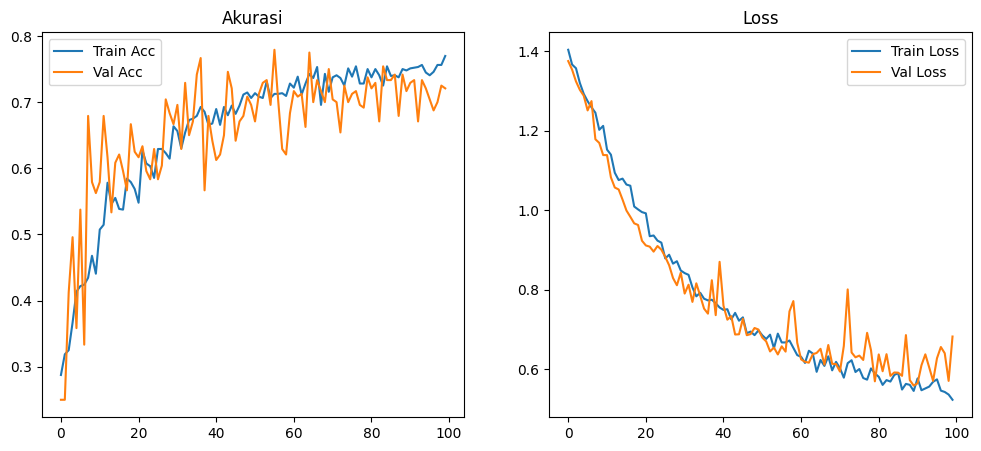

In [22]:
# 7. Visualisasi Akurasi dan Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Akurasi")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()
